Dataset:

https://www.kaggle.com/harlfoxem/housesalesprediction

# Imports

In [57]:
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

## Funções de suporte

In [2]:
def jupyter_settings():
#     %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 18
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None

In [3]:
jupyter_settings()

In [88]:
def cramerV(x, y):
    cm = pd.crosstab(x, y).values# Confusion matrix
    n = cm.sum()
    r, k = cm.shape
    chi2 = stats.chi2_contingency(cm)[0]# scipy.stats
    phi2 = chi2/n
    
    # Bias correction
    phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
    kcorr = k-(k-1)**2/(n-1)
    rcorr = r-(r-1)**2/(n-1)
    
    return np.sqrt(phi2corr/(min(kcorr-1, rcorr-1)))

# 1 Descrição dos dados

In [33]:
df1 = pd.read_csv('data/raw/kc_house_data.csv')

## 1.1 Renomear colunas

In [34]:
new_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'water_front', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
df1.columns = new_cols

## 1.2 Dimensão dos dados

In [35]:
print('Número de linhas: {}'.format(df1.shape[0]))
print('Número de colunas: {}'.format(df1.shape[1]))

Número de linhas: 21613
Número de colunas: 21


## 1.3 Tipos dos dados

In [36]:
df1['date'] = pd.to_datetime(df1['date'])

In [37]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
water_front               int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4 Tratar os NAs

In [38]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
water_front      0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5 Estatística descritiva

In [39]:
num_attributes = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
cat_attributes = df1[['water_front', 'view', 'condition', 'grade', 'zipcode']]

### 1.5.1 Atributos numéricos

In [11]:
# Tendência central - média, mediana
tc1 = pd.DataFrame(num_attributes.apply(np.mean)).T
tc2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(min)).T
d2 = pd.DataFrame(num_attributes.apply(max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Contatenar
m = pd.concat([d1, d2, d3, tc1, tc2, d4, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.0000,7.700000e+06,7.625000e+06,540088.141767,450000.0000,367118.703181,4.024069,34.585540
1,bedrooms,0.0000,3.300000e+01,3.300000e+01,3.370842,3.0000,0.930040,1.974300,49.063653
2,bathrooms,0.0000,8.000000e+00,8.000000e+00,2.114757,2.2500,0.770145,0.511108,1.279902
3,sqft_living,290.0000,1.354000e+04,1.325000e+04,2079.899736,1910.0000,918.419649,1.471555,5.243093
4,sqft_lot,520.0000,1.651359e+06,1.650839e+06,15106.967566,7618.0000,41419.553273,13.060019,285.077820
5,floors,1.0000,3.500000e+00,2.500000e+00,1.494309,1.5000,0.539976,0.616177,-0.484723
6,sqft_above,290.0000,9.410000e+03,9.120000e+03,1788.390691,1560.0000,828.071820,1.446664,3.402304
7,sqft_basement,0.0000,4.820000e+03,4.820000e+03,291.509045,0.0000,442.564804,1.577965,2.715574
8,yr_built,1900.0000,2.015000e+03,1.150000e+02,1971.005136,1975.0000,29.372731,-0.469805,-0.657408
9,yr_renovated,0.0000,2.015000e+03,2.015000e+03,84.402258,0.0000,401.669947,4.549493,18.701152


### 1.5.2 Atributos categóricos

In [12]:
cat_attributes.apply(lambda x: len(x.unique()))

water_front     2
view            5
condition       5
grade          12
zipcode        70
dtype: int64

<AxesSubplot:xlabel='grade', ylabel='price'>

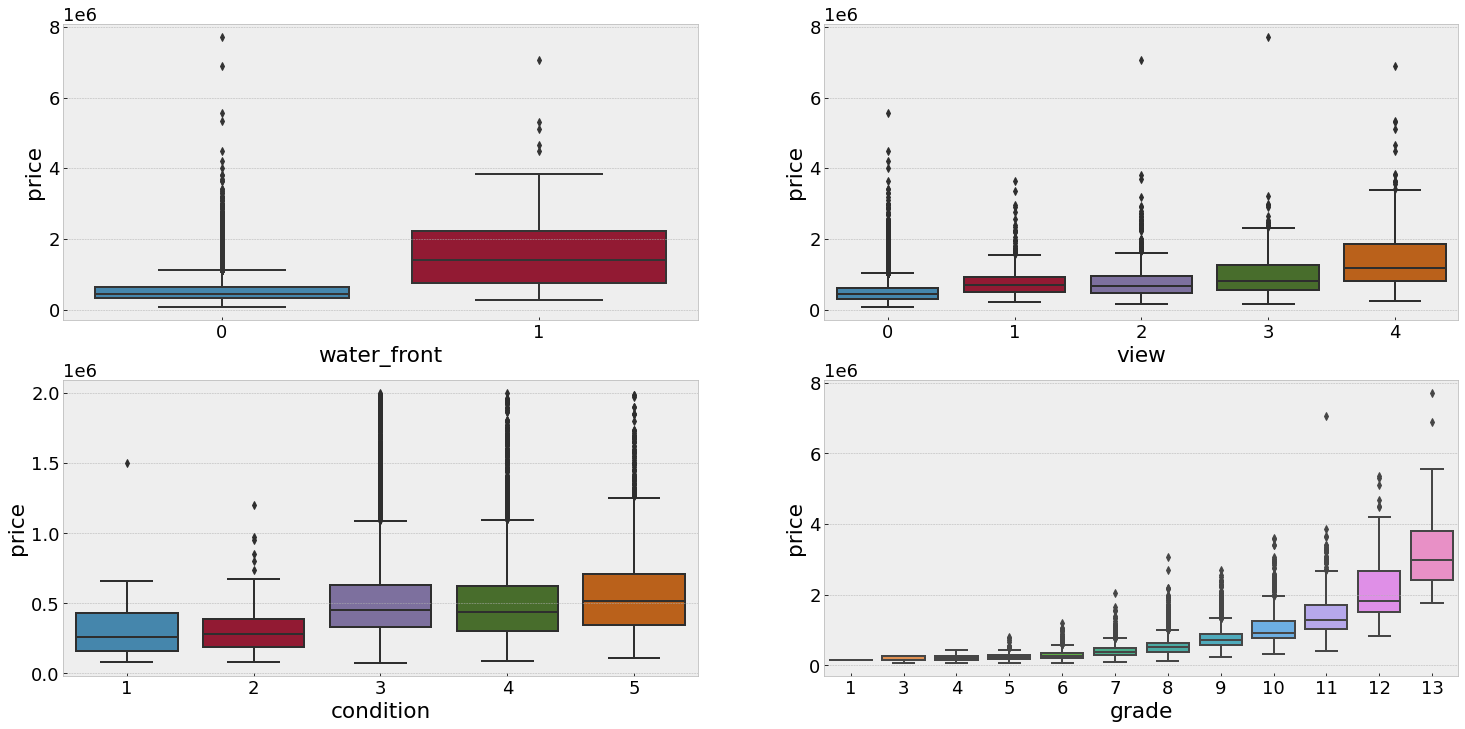

In [13]:
plt.subplot(221)
sns.boxplot(x = 'water_front', y = 'price', data = df1)

plt.subplot(222)
sns.boxplot(x = 'view', y = 'price', data = df1)

plt.subplot(223)
aux = df1[df1['price'] < 2e6]
sns.boxplot(x = 'condition', y = 'price', data = aux)

plt.subplot(224)
sns.boxplot(x = 'grade', y = 'price', data = df1)

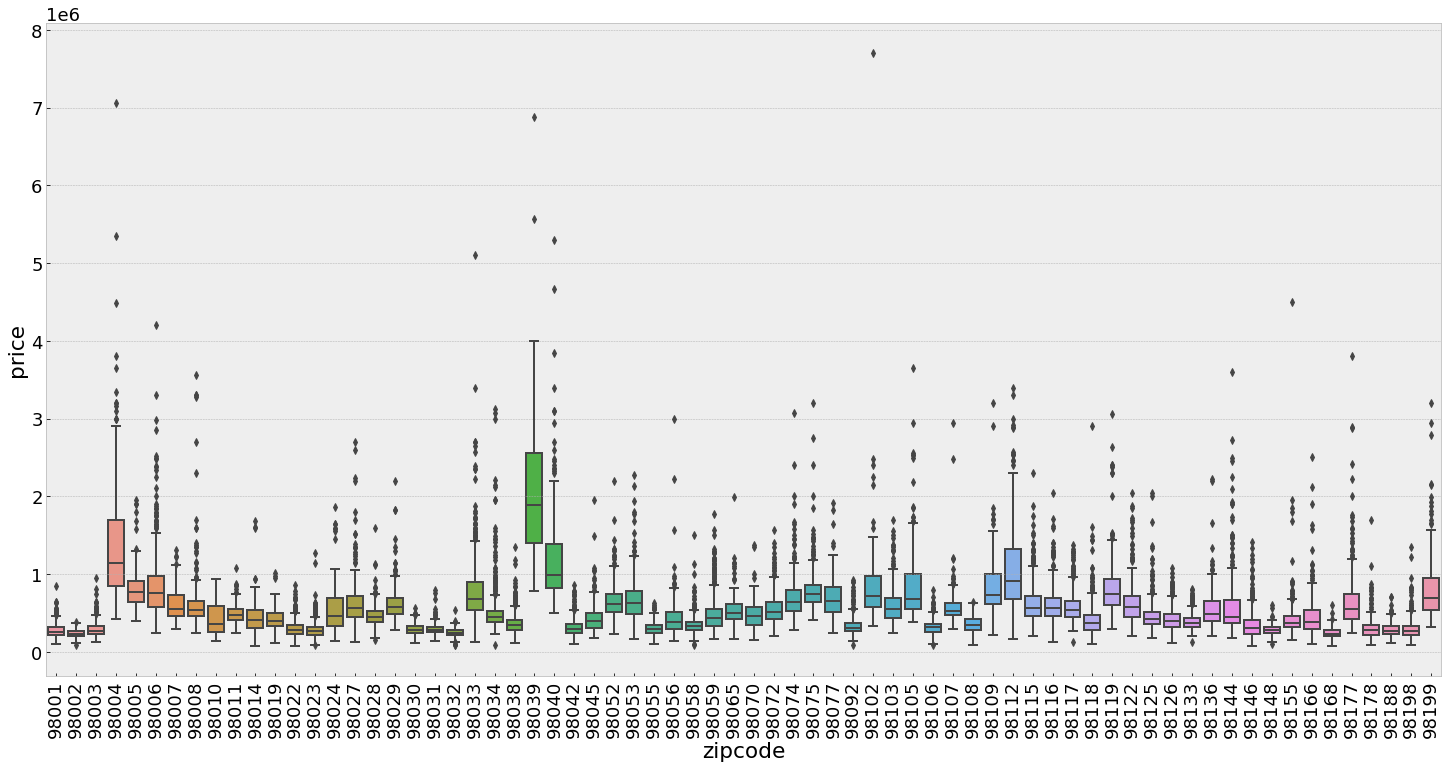

In [14]:
sns.boxplot(x = 'zipcode', y = 'price', data = df1)
plt.xticks(rotation = 90);

# 2 Feature engineering

## Data checkpoint

In [15]:
df2 = df1.copy()

In [16]:
df2.to_csv('data/interim/df2.csv', index = False)

In [79]:
df2 = pd.read_csv('data/interim/df2.csv')
df2['date'] = pd.to_datetime(df2['date'])

## 2.1 Hipóteses

**H1.** Os imóveis são mais caros no primeiro semestre

**H2.** Imóveis com vista para a água são 50% mais caros

**H3.** Imóveis reformados são 30% mais caros

**H4.** Imóveis construídos antes de 1970 são mais baratos

**H5.** O valor agregado pelo terceiro andar é menor que o valor agregado pelo segundo andar

## 2.2 Perguntas de negócios

**P1.** Quais imóveis comprar?

**P2.** Quando vender?

**P3.** Vender por qual preço?

## 2.2 Criação das variáveis

In [80]:
df2['month'] = df2['date'].apply(lambda x: x.month)
df2['renovated'] = df2['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df2['price_per_living_sqft'] = df2['price']/df2['sqft_living']
df2['price_per_lot_sqft'] = df2['price']/df2['sqft_lot']

# 3 Filtragem das variáveis

## Data checkpoint

In [81]:
df3 = df2.copy()

In [82]:
df3.to_csv('data/interim/df3.csv', index = False)

In [83]:
df3 = pd.read_csv('data/interim/df3.csv')
df3['date'] = pd.to_datetime(df3['date'])

## 3.1 Filtragem das colunas

In [84]:
drop_cols = ['sqft_living15', 'sqft_lot15']
df3.drop(drop_cols, axis = 1, inplace = True)

# 4 Análise exploratória de dados

## Data checkpoint

In [85]:
df4 = df3.copy()

In [86]:
df4.to_csv('data/interim/df4.csv', index = False)

In [4]:
df4 = pd.read_csv('data/interim/df4.csv')
df4['date'] = pd.to_datetime(df4['date'])

## 4.1 Análise univariada

In [82]:
num_attributes = df4[['price', 'month', 'price_per_living_sqft', 'price_per_lot_sqft', 'bedrooms', 
                      'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 
                      'yr_built', 'yr_renovated', 'lat', 'long']]
cat_attributes = df4[['water_front', 'view', 'condition', 'grade', 'zipcode']]

### 4.1.1 Variável resposta

Preço médio 540,088.14
Preço mediano 450,000.00


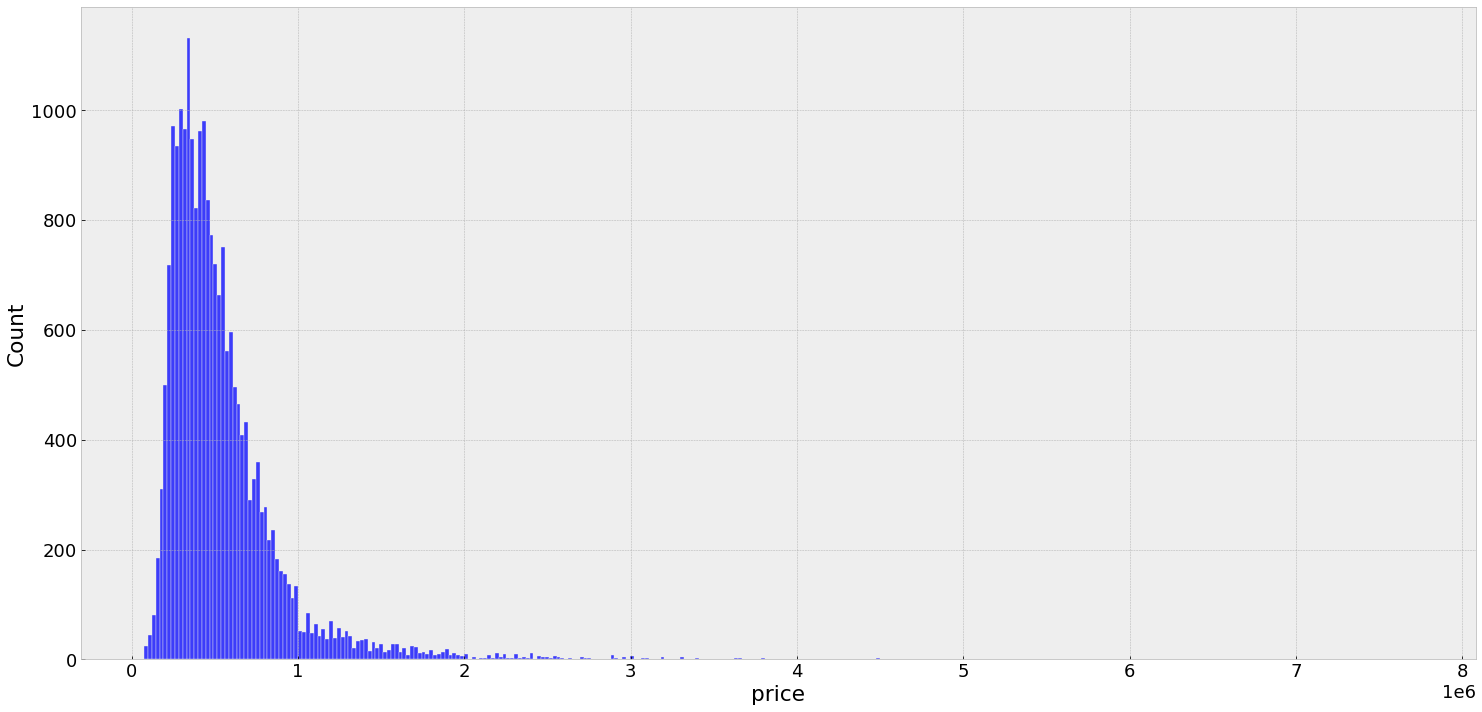

In [9]:
sns.histplot(df4['price'])
print('Preço médio {:,.2f}'.format(df4['price'].mean()))
print('Preço mediano {:,.2f}'.format(df4['price'].median()))

Preço/living sqft médio 264.16
Preço/living sqft mediano 244.64


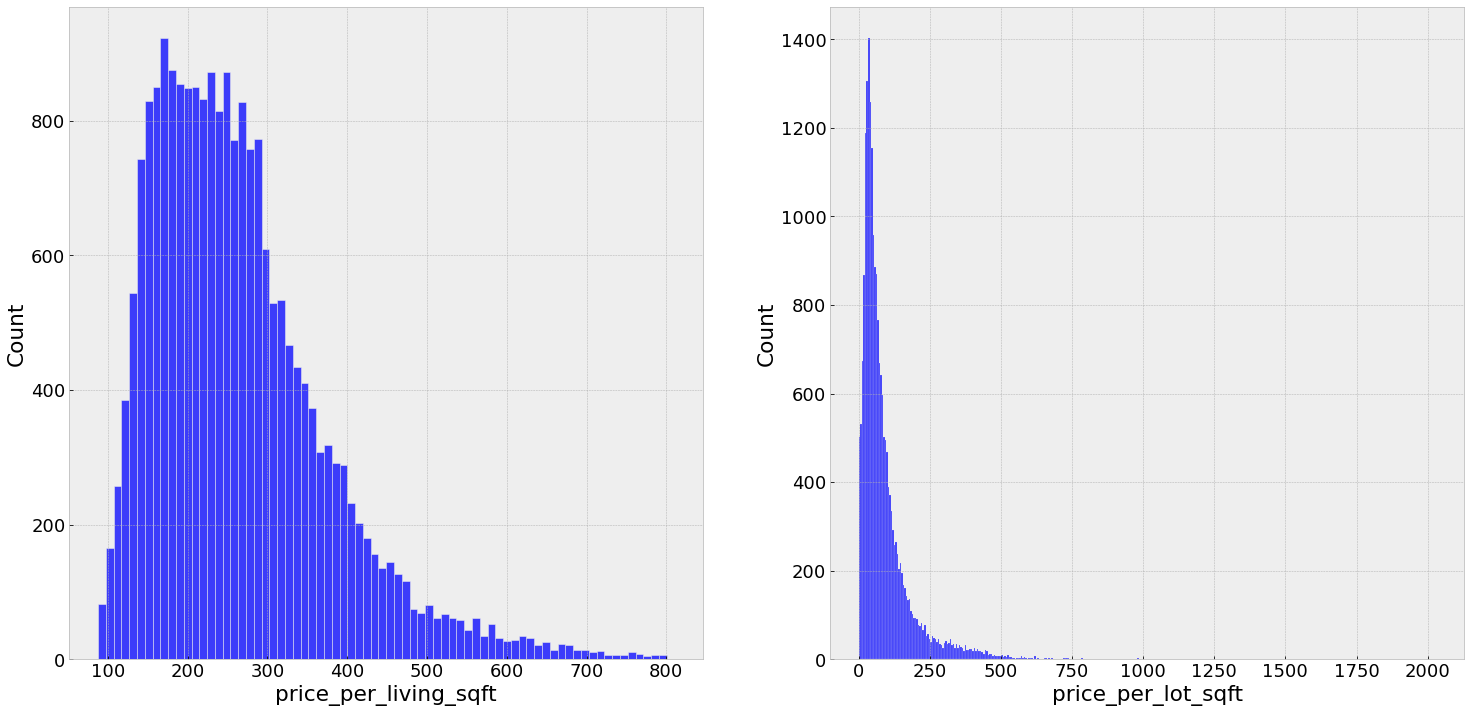

In [10]:
plt.subplot(121)
sns.histplot(df4['price_per_living_sqft'])

plt.subplot(122)
sns.histplot(df4['price_per_lot_sqft'])

print('Preço/living sqft médio {:,.2f}'.format(df4['price_per_living_sqft'].mean()))
print('Preço/living sqft mediano {:,.2f}'.format(df4['price_per_living_sqft'].median()))

### 4.1.2 Variáveis numéricas

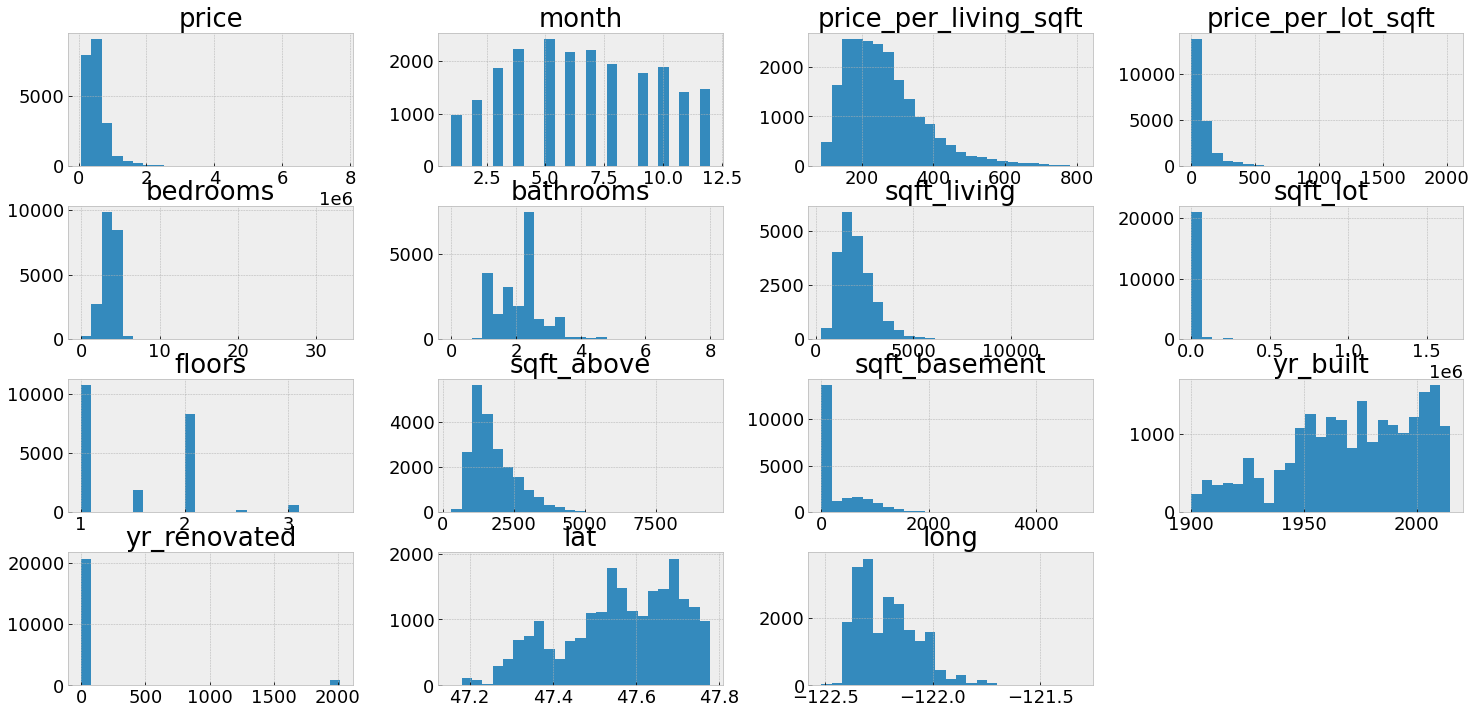

In [84]:
num_attributes.hist(bins = 25);

### 4.1.3 Variáveis categóricas

<AxesSubplot:xlabel='price_per_living_sqft', ylabel='Density'>

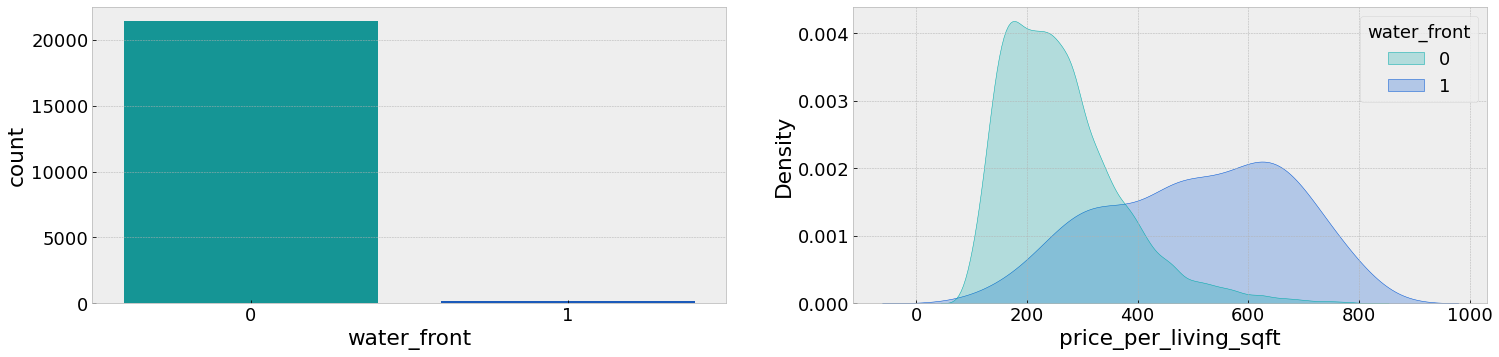

In [61]:
plt.subplot(221)
sns.countplot(x = 'water_front', data = df4, palette = 'winter_r')

plt.subplot(222)
sns.kdeplot(x = 'price_per_living_sqft', data = df4, hue = 'water_front', common_norm = False, shade = True, palette = 'winter_r')

<AxesSubplot:xlabel='price_per_living_sqft', ylabel='Density'>

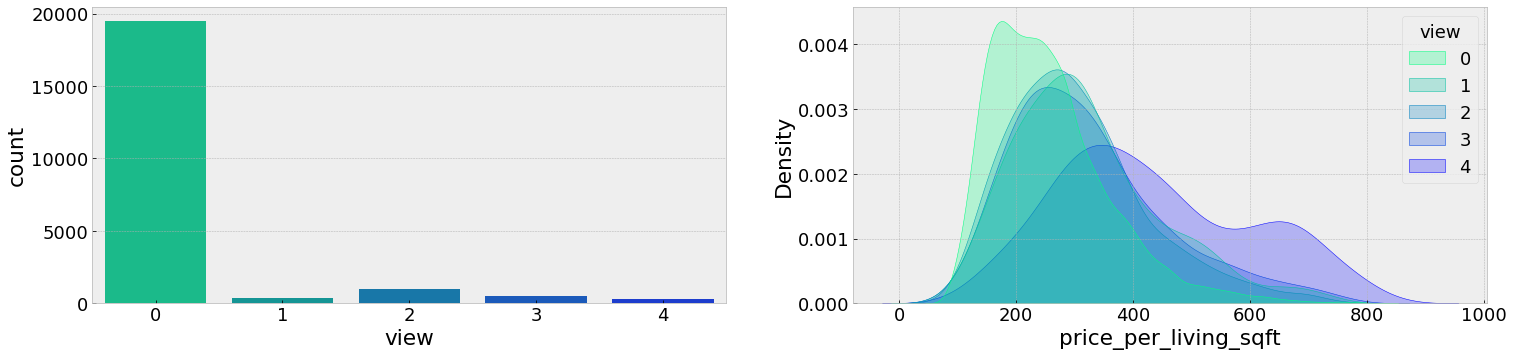

In [62]:
plt.subplot(221)
sns.countplot(x = 'view', data = df4, palette = 'winter_r')

plt.subplot(222)
sns.kdeplot(x = 'price_per_living_sqft', data = df4, hue = 'view', common_norm = False, shade = True, palette = 'winter_r')

<AxesSubplot:xlabel='price_per_living_sqft', ylabel='Density'>

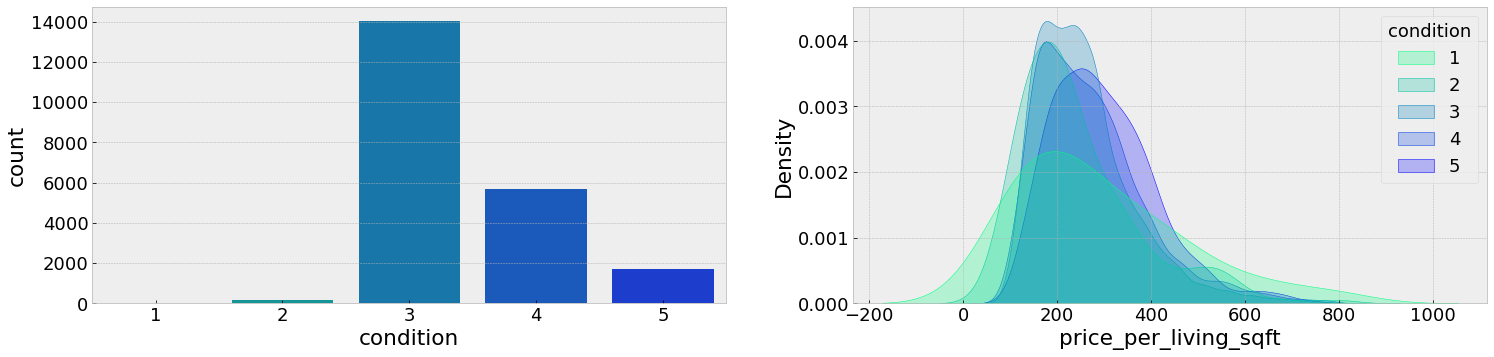

In [63]:
plt.subplot(221)
sns.countplot(x = 'condition', data = df4, palette = 'winter_r')

plt.subplot(222)
sns.kdeplot(x = 'price_per_living_sqft', data = df4, hue = 'condition', common_norm = False, shade = True, palette = 'winter_r')

C:\Users\lucas\Anaconda3\envs\house-sales\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price_per_living_sqft', ylabel='Density'>

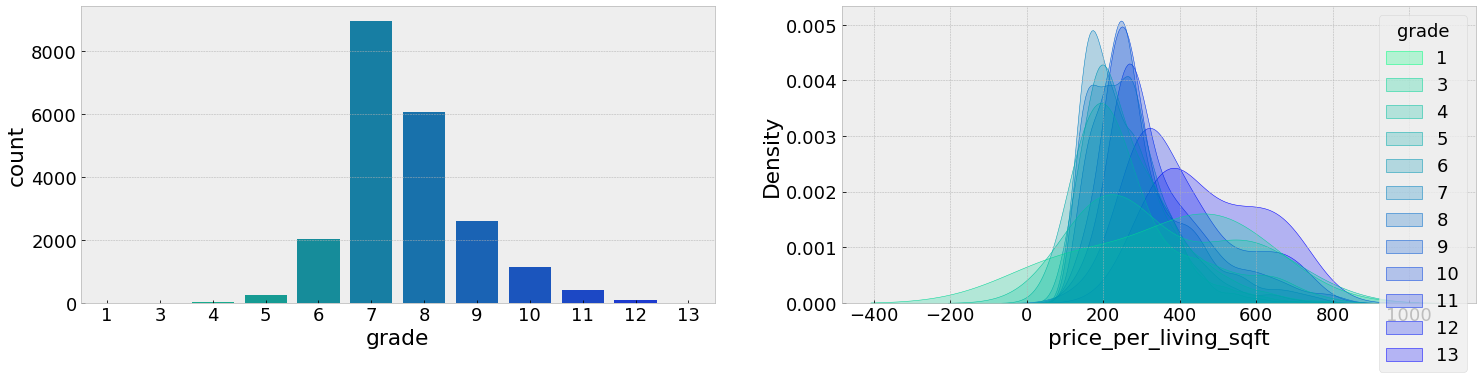

In [64]:
plt.subplot(221)
sns.countplot(x = 'grade', data = df4, palette = 'winter_r')

plt.subplot(222)
sns.kdeplot(x = 'price_per_living_sqft', data = df4, hue = 'grade', common_norm = False, shade = True, palette = 'winter_r')

## 4.2 Análise bivariada

### 4.2.1 H1: Os imóveis são mais caros no primeiro semestre
Verdadeiro: os imóveis são mais caros em média no mês de abril

<AxesSubplot:xlabel='month', ylabel='price'>

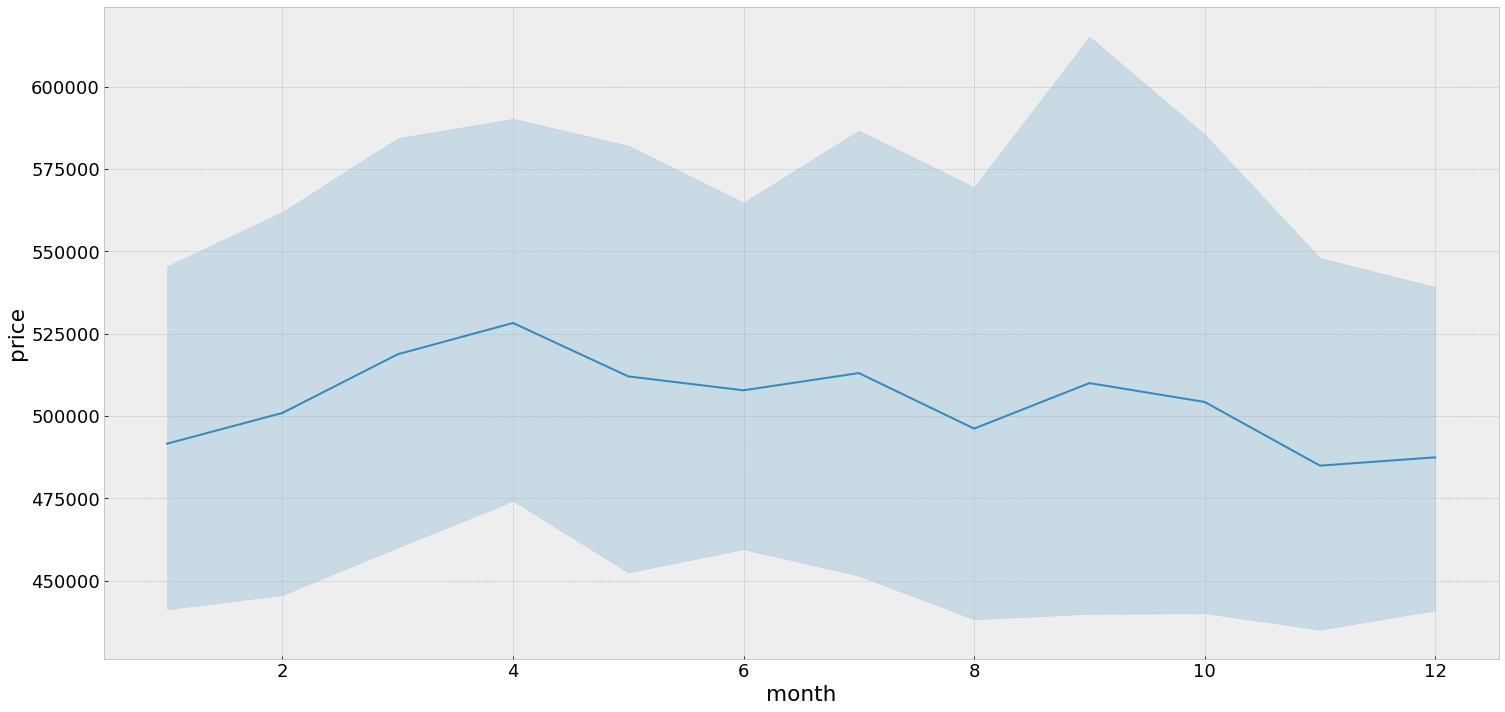

In [78]:
aux = df4[['zipcode', 'month', 'price']].groupby(['zipcode', 'month']).median().reset_index()
sns.lineplot(data = aux, x = 'month', y = 'price')

### 4.2.2 H2: Imóveis com vista para a água são 50% mais caros
Verdadeiro: a diferença de preço média sobre as regiões é de 231%

In [20]:
filter_zip = df4.loc[df4['water_front'] == 1, 'zipcode'].unique()
aux1 = df4[df4['zipcode'].isin(filter_zip)]
aux2 = aux1[['zipcode', 'water_front', 'price']].groupby(['zipcode', 'water_front']).mean().reset_index()

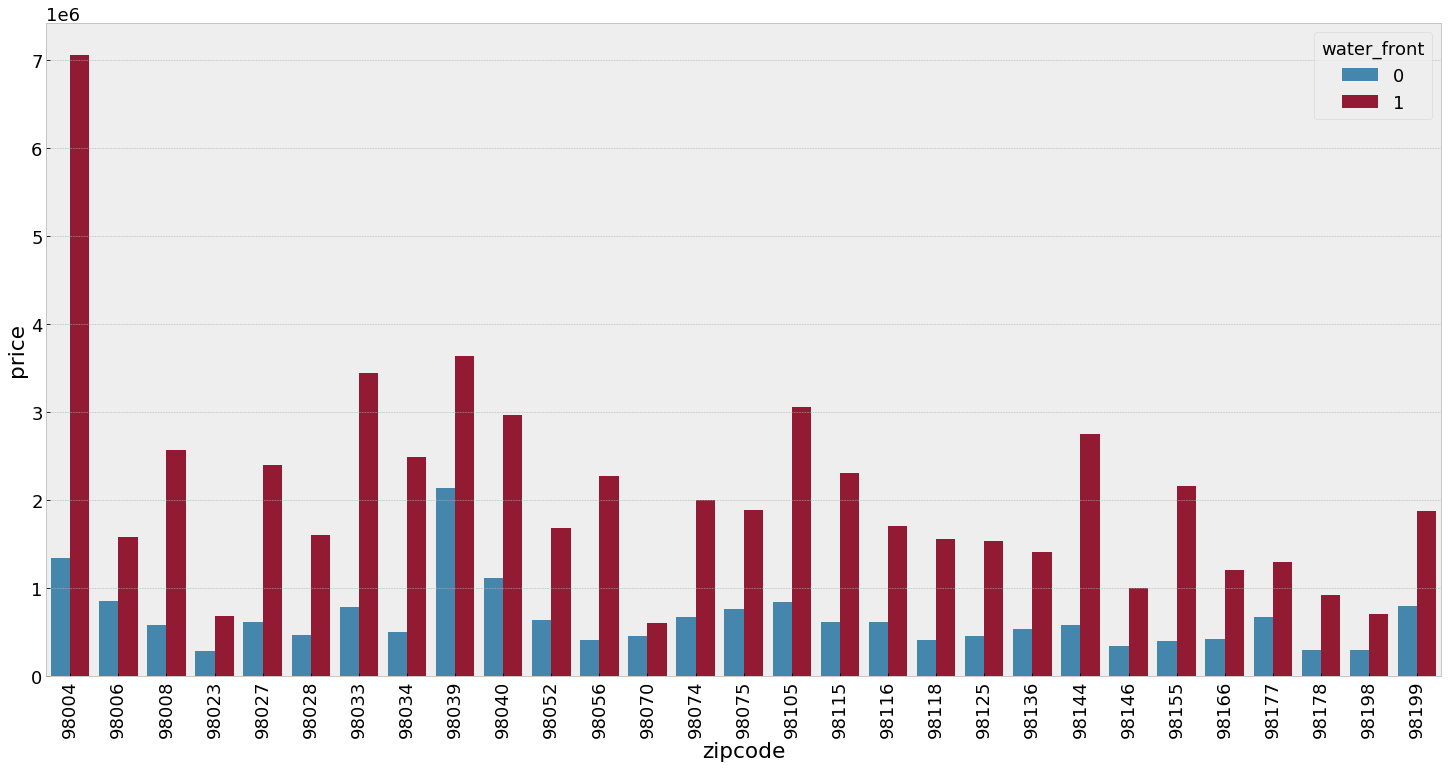

In [22]:
sns.barplot(data = aux2, x = 'zipcode', y = 'price', hue = 'water_front')
plt.xticks(rotation = 90);

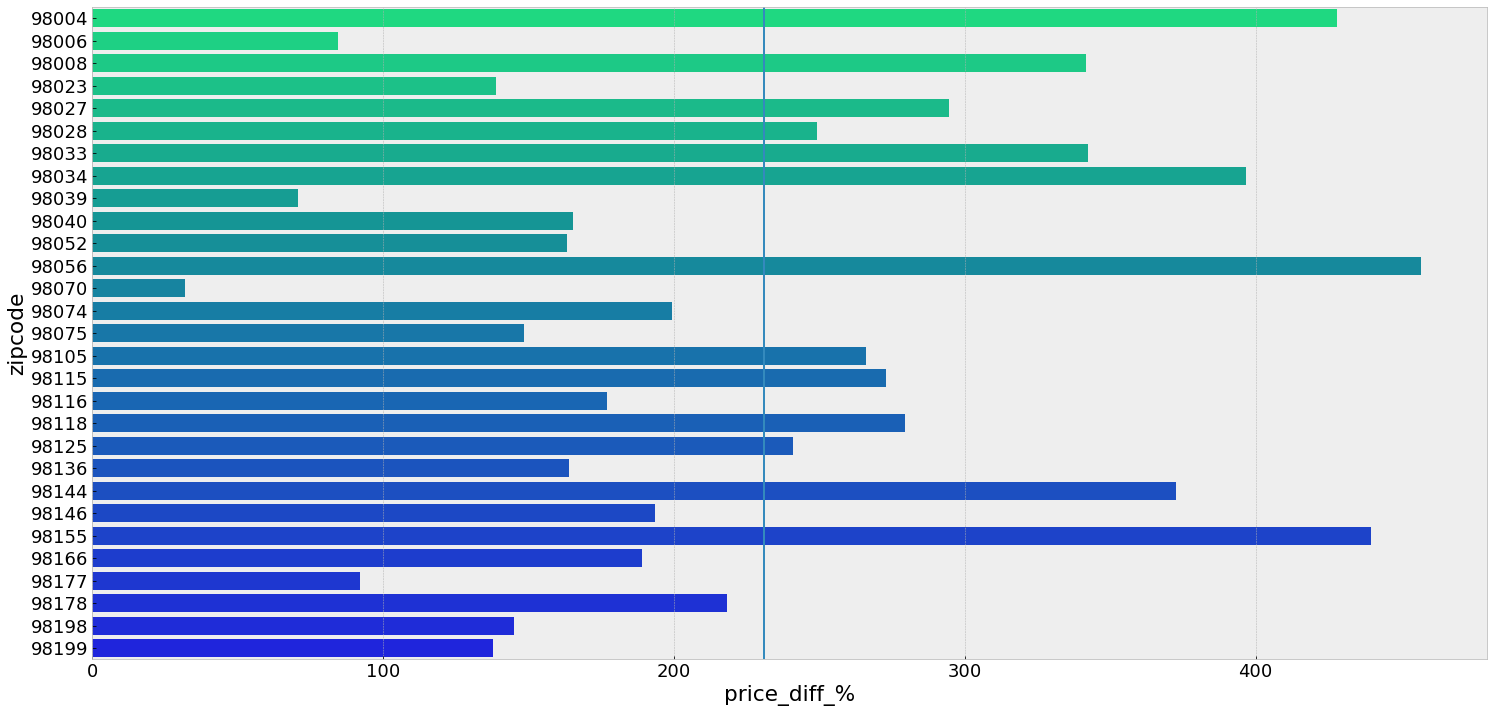

In [55]:
diff = {}
for zipcode in aux2['zipcode'].unique():
    waterf = aux2.loc[(aux2['zipcode'] == zipcode) & (aux2['water_front'] == 1), 'price'].iloc[0]
    nowaterf = aux2.loc[(aux2['zipcode'] == zipcode) & (aux2['water_front'] == 0), 'price'].iloc[0]
    diff[zipcode] = 100*(waterf-nowaterf)/nowaterf
aux3 = pd.DataFrame(diff, index = [0]).T.reset_index()
aux3.columns = ['zipcode', 'price_diff_%']
sns.barplot(data = aux3, x = 'price_diff_%', y = 'zipcode', orient = 'h', palette = 'winter_r')
plt.axvline(aux3['price_diff_%'].mean())

In [53]:
print('Min price difference: {:.1f}%'.format(aux3['price_diff_%'].min()))
print('Max price difference: {:.1f}%'.format(aux3['price_diff_%'].max()))
print('Average price difference: {:.1f}%'.format(aux3['price_diff_%'].mean()))

Min price difference: 31.9%
Max price difference: 456.7%
Average price difference: 231.0%


### 4.2.3 H3: Imóveis reformados são 30% mais caros
Verdadeiro: imóveis reformados são em média 43% mais caros

In [10]:
aux = df4[['price', 'renovated']].groupby('renovated').mean().reset_index()
dif = 100*(aux['price'].iloc[1]-aux['price'].iloc[0])/aux['price'].iloc[0]
print('Imóveis reformados são {:.1f}% mais caros'.format(dif))
aux['price'] = aux['price'].apply(lambda x: '${:,.2f}'.format(x))
aux

Imóveis reformados são 43.4% mais caros


,renovated,price
0,0,"$530,360.82"
1,1,"$760,379.03"


### 4.2.4 H4: Imóveis construídos antes de 1970 são mais baratos
Falso: os imóveis mais baratos são aqueles construídos entre 1940 e 1969

C:\Users\lucas\AppData\Local\Temp/ipykernel_10712/1210644104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['built'] = aux['yr_built'].apply(lambda x: x-x%5)


<AxesSubplot:xlabel='built', ylabel='price'>

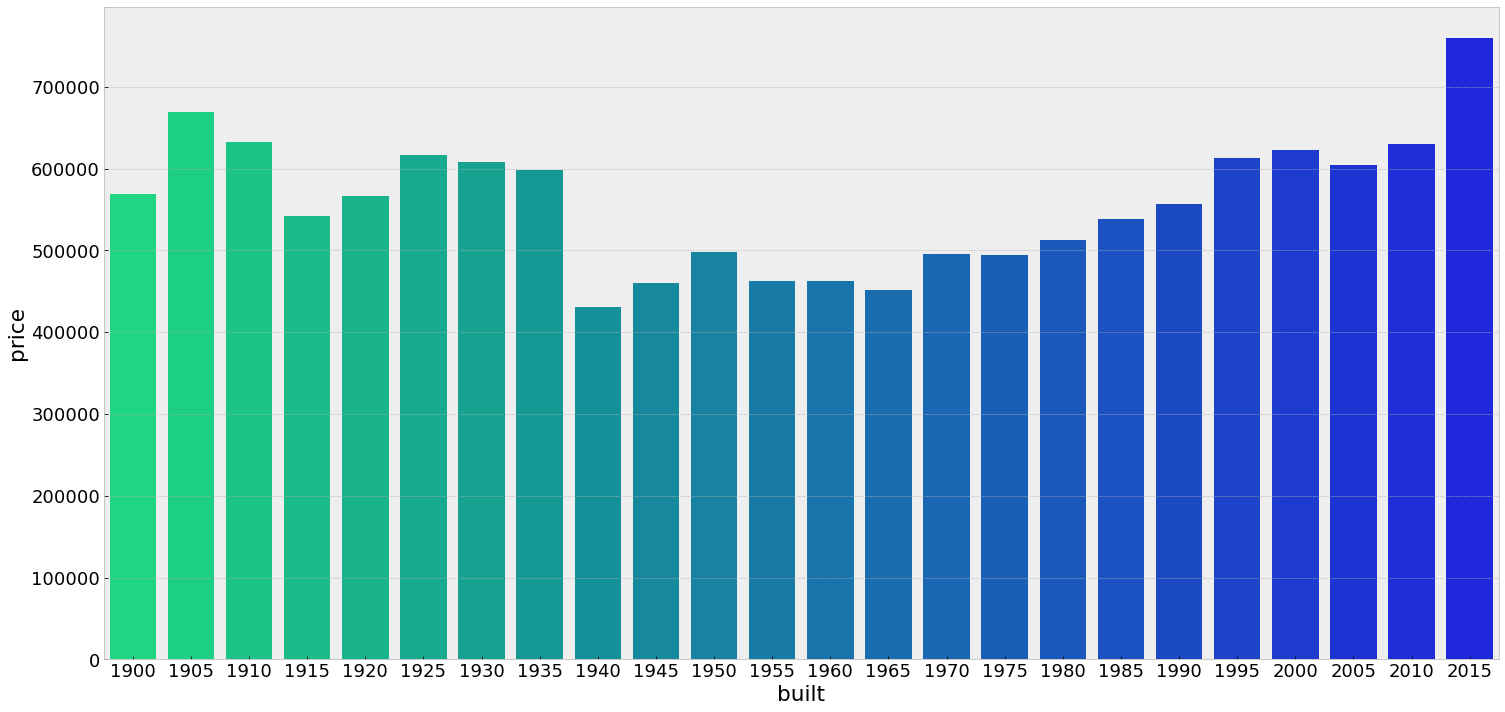

In [16]:
aux = df4[['yr_built', 'price']]
aux['built'] = aux['yr_built'].apply(lambda x: x-x%5)
aux = aux.groupby('built').mean().reset_index()
sns.barplot(data = aux, x = 'built', y = 'price', palette = 'winter_r')

### 4.2.5 H5: O valor agregado pelo terceiro andar é menor que o valor agregado pelo segundo andar
Verdadeiro: o preço médio de imóveis com 2 andares é 12% maior que o preço de imóveis de 3 andares

<AxesSubplot:xlabel='floors', ylabel='price'>

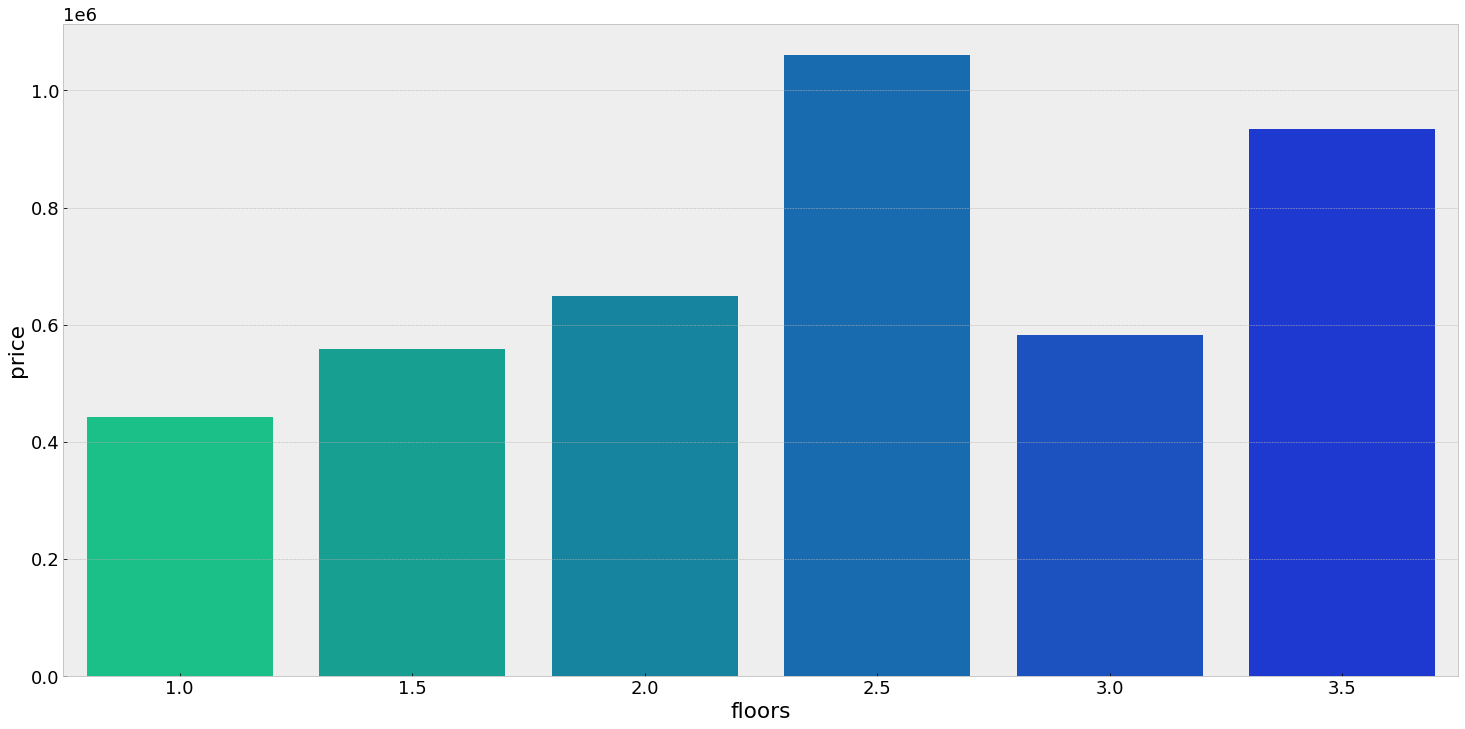

In [123]:
aux1 = df4[['floors', 'price']].groupby('floors').mean().reset_index()
sns.barplot(data = aux1, x = 'floors', y = 'price', palette = 'winter_r')

In [135]:
# Agrupando andares 1 e 1.5, 2 e 2.5, 3 e 3.5
d = {}
d[1] = df4.loc[(df4['floors'] == 1) | (df4['floors'] == 1.5), 'price'].mean()
d[2] = df4.loc[(df4['floors'] == 2) | (df4['floors'] == 2.5), 'price'].mean()
d[3] = df4.loc[(df4['floors'] == 3) | (df4['floors'] == 3.5), 'price'].mean()
aux2 = pd.DataFrame(d, index = [0]).T.reset_index()
aux2.columns = ['floors', 'mean_price']

aux2['added_value'] = [0, 
                       aux2['mean_price'].iloc[1]-aux2['mean_price'].iloc[0], 
                       aux2['mean_price'].iloc[2]-aux2['mean_price'].iloc[1]]

aux2

,floors,mean_price,added_value
0,1,459900.094043,0.000000
1,2,656775.513211,196875.419168
2,3,587045.027375,-69730.485836


In [136]:
floor2 = aux2['mean_price'].iloc[1]
floor3 = aux2['mean_price'].iloc[2]
print('2 floor homes are {:.1f}% more expensive than 3 floor homes'.format(
      100*(floor2-floor3)/floor3))

2 floor homes are 11.9% more expensive than 3 floor homes


## 4.3 Análise multivariada

### 4.3.1 Atributos numéricos

<AxesSubplot:>

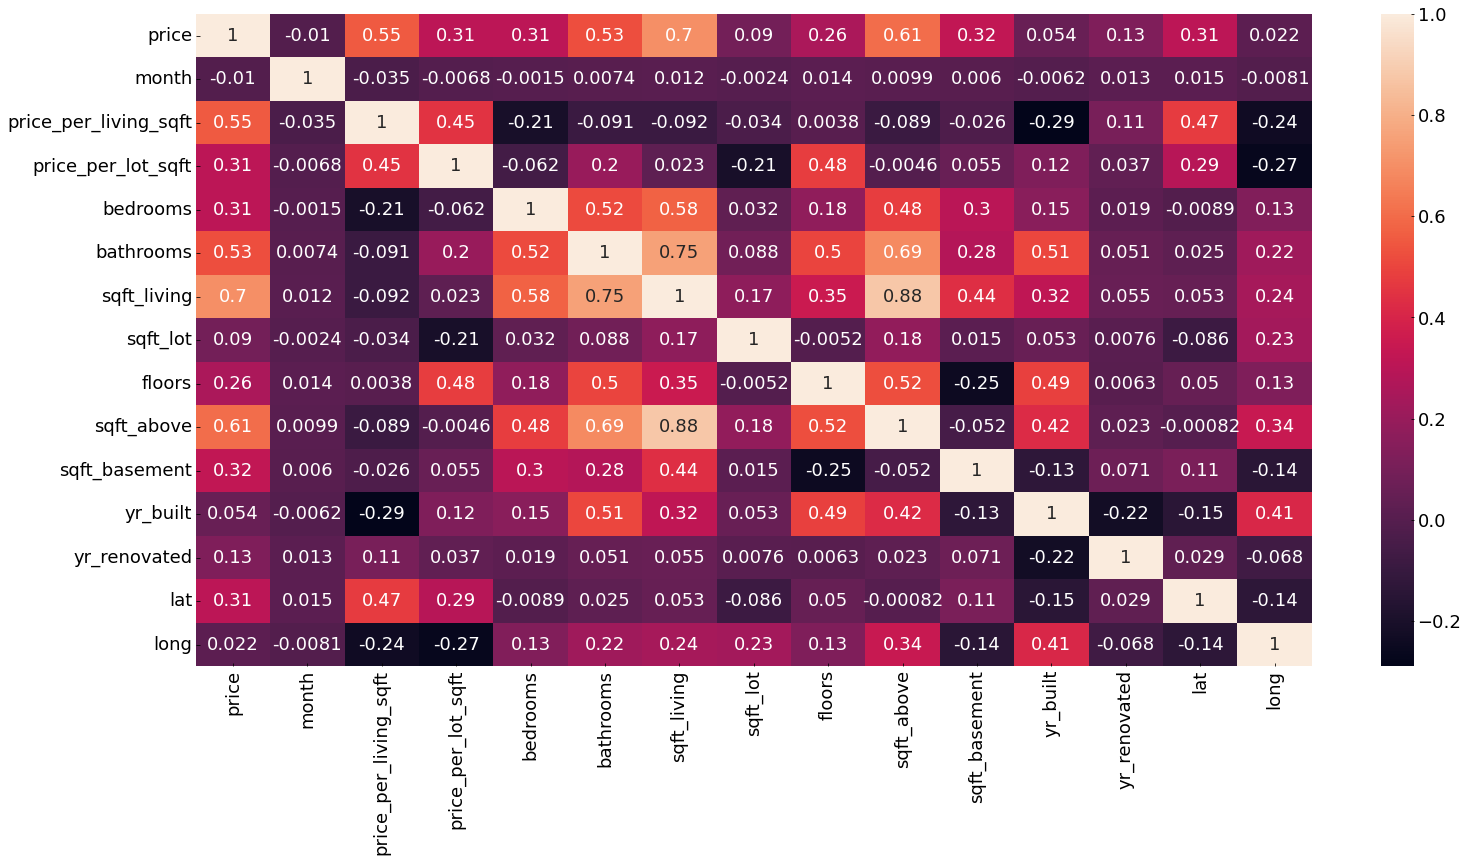

In [87]:
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot = True)

### 4.3.2 Atributos categóricos

<AxesSubplot:>

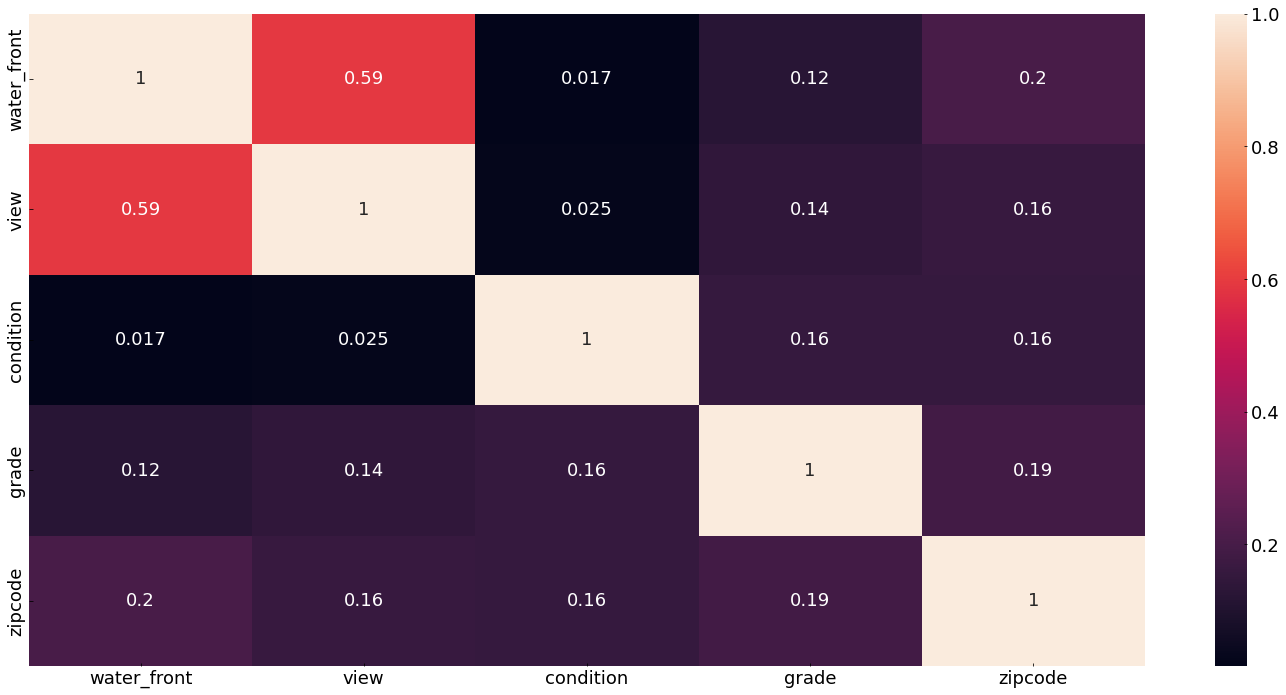

In [93]:
# Dados categóricos
cat = cat_attributes.copy()

# Cálculo do V de Cramér
a1 = cramerV(cat['water_front'], cat['water_front'])
a2 = cramerV(cat['water_front'], cat['view'])
a3 = cramerV(cat['water_front'], cat['condition'])
a4 = cramerV(cat['water_front'], cat['grade'])
a5 = cramerV(cat['water_front'], cat['zipcode'])

a6 = cramerV(cat['view'], cat['water_front'])
a7 = cramerV(cat['view'], cat['view'])
a8 = cramerV(cat['view'], cat['condition'])
a9 = cramerV(cat['view'], cat['grade'])
a10 = cramerV(cat['view'], cat['zipcode'])

a11 = cramerV(cat['condition'], cat['water_front'])
a12 = cramerV(cat['condition'], cat['view'])
a13 = cramerV(cat['condition'], cat['condition'])
a14 = cramerV(cat['condition'], cat['grade'])
a15 = cramerV(cat['condition'], cat['zipcode'])

a16 = cramerV(cat['grade'], cat['water_front'])
a17 = cramerV(cat['grade'], cat['view'])
a18 = cramerV(cat['grade'], cat['condition'])
a19 = cramerV(cat['grade'], cat['grade'])
a20 = cramerV(cat['grade'], cat['zipcode'])

a21 = cramerV(cat['zipcode'], cat['water_front'])
a22 = cramerV(cat['zipcode'], cat['view'])
a23 = cramerV(cat['zipcode'], cat['condition'])
a24 = cramerV(cat['zipcode'], cat['grade'])
a25 = cramerV(cat['zipcode'], cat['zipcode'])

# Conjunto final
d = pd.DataFrame({'water_front': [a1, a2, a3, a4, a5], 
                  'view': [a6, a7, a8, a9, a10], 
                  'condition': [a11, a12, a13, a14, a15], 
                  'grade': [a16, a17, a18, a19, a20], 
                  'zipcode': [a21, a22, a23, a24, a25]})
d.set_index(d.columns, inplace = True)

sns.heatmap(d, annot = True)

# 5 Respondendo as perguntas de negócios

## Data checkpoint

In [89]:
df5 = df4.copy()

In [90]:
df5.to_csv('data/interim/df5.csv', index = False)

In [17]:
df5 = pd.read_csv('data/interim/df5.csv')
df5['date'] = pd.to_datetime(df5['date'])

## 5.1 P1: Quais imóveis comprar?
Imóveis com preço abaixo da mediana local, condition > 3 e grade > 7

In [19]:
aux = df5[['zipcode', 'price']].groupby('zipcode').median().reset_index().rename(columns = {'price': 'median_price'})
df5 = df5.merge(aux, how = 'left', on = 'zipcode')
df5 = df5[['id', 'date', 'month', 'price', 'price_per_living_sqft', 
           'price_per_lot_sqft','zipcode','median_price', 
           'condition', 'grade','bedrooms', 'bathrooms', 
           'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 
           'floors', 'water_front', 'view', 'yr_built', 
           'yr_renovated', 'lat', 'long']]

In [20]:
df5['buy'] = df5.apply(lambda x: 1 if (x['price'] < x['median_price']) and (x['condition'] > 3) and (x['grade'] > 7) 
                                   else 0, axis = 1)

In [21]:
# Número de imóveis recomendados para compra
df5['buy'].value_counts()

0    20921
1      692
Name: buy, dtype: int64

In [22]:
# Número de imóveis recomendados por área
aux = df5[['zipcode', 'buy']].groupby('zipcode').sum().reset_index()
aux.sort_values('buy', inplace = True, ascending = False)
aux.head()

,zipcode,buy
5,98006,114
25,98040,78
28,98052,53
3,98004,39
15,98027,34


## 5.2 P2: Quando vender?
Vender no mês de alta dos preços na região correspondente

In [23]:
aux1 = df5[['month', 'zipcode', 'price']].groupby(['zipcode', 'month']).median().reset_index()
aux2 = aux1.groupby('zipcode').max().reset_index()
aux2['month'] = aux2.apply(lambda x: aux1.loc[(aux1['zipcode'] == x['zipcode']) & (aux1['price'] == x['price']), 'month'].iloc[0], axis = 1)
aux2.rename(columns = {'month': 'high_month', 'price': 'high_median_price'}, inplace = True)
df5 = df5.merge(aux2, how = 'left', on = 'zipcode')

## 5.3 P3: Vender por qual preço?
Se o valor de compra (VC) for maior que o valor de mercado (VM): VC + 10%

Se o VC for menor que o VM: VC + 30%

In [46]:
df5['sell_price'] = df5.apply(lambda x: -1 if x['buy'] == 0 
                              else x['price']*1.1 
                              if x['price'] > x['high_median_price'] 
                              else x['price']*1.3, axis = 1)
df5['profit'] = df5.apply(lambda x: x['sell_price']-x['price'], axis = 1)

## 5.4 Respostas

In [47]:
# Relação dos imóveis recomendados para compra
buy_recom = df5[df5['buy'] == 1]

In [52]:
# Investimento total
investment = buy_recom['price'].sum()
print('${:,.2f}'.format(investment))

$407,142,664.00


In [53]:
# Lucro nas vendas
profit = buy_recom['profit'].sum()
print('${:,.2f}'.format(profit))

$122,142,799.20


In [55]:
# ROI
roi = 100*profit/investment
print('{:.1f}%'.format(roi))

30.0%


In [90]:
fig = px.scatter_mapbox(buy_recom, 
                        lat = 'lat', lon = 'long', 
                        hover_name = 'id', 
                        hover_data = ['price', 'grade', 'condition'], 
                        color = 'price', 
                        zoom = 9, 
                        height = 300)
fig.update_layout(mapbox_style = 'open-street-map', 
                  height = 600, 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [91]:
buy_recom.head()

,id,date,month,price,price_per_living_sqft,price_per_lot_sqft,zipcode,median_price,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,water_front,view,yr_built,yr_renovated,lat,long,buy,high_month,high_median_price,sell_price,profit
27,3303700376,2014-12-01,12,667000.0,476.428571,421.884883,98112,915000.0,5,8,3,1.00,1400,1581,1400,0,1.5,0,0,1909,0,47.6221,-122.314,1,3,1225000.0,867100.0,200100.0
33,7589200193,2014-11-10,11,535000.0,490.825688,178.333333,98117,544000.0,4,8,3,1.00,1090,3000,1090,0,1.5,0,0,1929,0,47.6889,-122.375,1,1,625000.0,695500.0,160500.0
51,7231300125,2015-02-17,2,345000.0,109.523810,37.770966,98056,380000.0,4,8,5,2.50,3150,9134,1640,1510,1.0,0,0,1966,0,47.4934,-122.189,1,4,410000.0,448500.0,103500.0
107,3530510041,2014-07-23,7,188500.0,152.016129,75.611713,98198,265000.0,4,8,2,1.75,1240,2493,1240,0,1.0,0,0,1985,0,47.3813,-122.322,1,1,287675.0,245050.0,56550.0
141,1777500060,2014-07-08,7,527700.0,187.127660,56.288000,98006,760184.5,4,8,5,2.50,2820,9375,1550,1270,1.0,0,0,1968,0,47.5707,-122.128,1,6,826000.0,686010.0,158310.0
